# Preparação dos dados

In [3]:
import os

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

sns.set_theme()

## Importar dataset

In [4]:
data_path = '../data/' if os.path.exists('../data/') else 'https://raw.githubusercontent.com/kreativermario/Projeto-DECD/master/data/'

merged_path = data_path + 'treated/merged-dataset.csv'

merged_df = pd.read_csv(merged_path)

## Criar o conjunto totalmente categórico
- Visualizar os gráficos e ver a distribuição das variáveis.
- Ver quantos outliers existem por variável

In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9790 entries, 0 to 9789
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nível_de_tensão               9790 non-null   object 
 1   ano                           9790 non-null   int64  
 2   mês                           9790 non-null   int64  
 3   energia_ativa_(kwh)           9790 non-null   float64
 4   cpes_doméstico                9790 non-null   float64
 5   cpes_iluminação_pública       9790 non-null   float64
 6   cpes_não_doméstico            9790 non-null   float64
 7   cpes_outros                   9790 non-null   float64
 8   cpes_mobilidade_eletrica_não  9790 non-null   float64
 9   cpes_mobilidade_eletrica_sim  9790 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 765.0+ KB


### Sabendo a estrutura de dados do dataset, existem algumas variáveis que são obviamente categóricas.
- São: nível_de_tensão, ano, mês
- Pode-se observar esse facto utilizando a função unique()

In [6]:
categorical_columns = ['nível_de_tensão', 'ano', 'mês']
for column in categorical_columns:
    print(f"Unique values in {column}: {merged_df[column].unique()}")


Unique values in nível_de_tensão: ['Baixa Tensão' 'Muito Alta, Alta e Média Tensões']
Unique values in ano: [2022 2023 2024]
Unique values in mês: [ 8  9 10 11 12  1  2  3  4  5  6  7]


- Transformar em categórico

In [7]:
merged_df['nível_de_tensão'] = merged_df['nível_de_tensão'].astype('category')
merged_df['ano'] = merged_df['ano'].astype('category')
merged_df['mês'] = merged_df['mês'].astype('category')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9790 entries, 0 to 9789
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   nível_de_tensão               9790 non-null   category
 1   ano                           9790 non-null   category
 2   mês                           9790 non-null   category
 3   energia_ativa_(kwh)           9790 non-null   float64 
 4   cpes_doméstico                9790 non-null   float64 
 5   cpes_iluminação_pública       9790 non-null   float64 
 6   cpes_não_doméstico            9790 non-null   float64 
 7   cpes_outros                   9790 non-null   float64 
 8   cpes_mobilidade_eletrica_não  9790 non-null   float64 
 9   cpes_mobilidade_eletrica_sim  9790 non-null   float64 
dtypes: category(3), float64(7)
memory usage: 564.8 KB


In [11]:
# Define a dictionary for the new categories
new_categories = {'Baixa Tensão': 1.0, 'Muito Alta, Alta e Média Tensões': 2.0}

# Replace the values
merged_df['nível_de_tensão'] = merged_df['nível_de_tensão'].map(new_categories)

# Check the new DataFrame info
merged_df.info()

merged_df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9790 entries, 0 to 9789
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   nível_de_tensão               0 non-null      float64 
 1   ano                           9790 non-null   category
 2   mês                           9790 non-null   category
 3   energia_ativa_(kwh)           9790 non-null   float64 
 4   cpes_doméstico                9790 non-null   float64 
 5   cpes_iluminação_pública       9790 non-null   float64 
 6   cpes_não_doméstico            9790 non-null   float64 
 7   cpes_outros                   9790 non-null   float64 
 8   cpes_mobilidade_eletrica_não  9790 non-null   float64 
 9   cpes_mobilidade_eletrica_sim  9790 non-null   float64 
dtypes: category(2), float64(8)
memory usage: 631.6 KB


,nível_de_tensão,energia_ativa_(kwh),cpes_doméstico,cpes_iluminação_pública,cpes_não_doméstico,cpes_outros,cpes_mobilidade_eletrica_não,cpes_mobilidade_eletrica_sim
count,0.0,9.790000e+03,9790.000000,9790.000000,9790.000000,9790.000000,9790.000000,9790.000000
mean,NaN,6.698904e+06,9437.674055,107.457508,2176.664760,64.922983,13562.938815,4.675996
std,NaN,1.301081e+07,22853.667206,174.274733,5290.937589,159.619755,22955.528565,12.331074
min,NaN,1.899000e+03,0.000000,0.000000,5.000000,0.000000,572.000000,0.000000
25%,NaN,8.817195e+05,0.000000,0.000000,52.000000,0.000000,3063.000000,1.000000
50%,NaN,2.290926e+06,1289.500000,15.000000,428.000000,5.000000,5692.500000,1.000000
75%,NaN,6.572700e+06,8943.000000,141.000000,2000.000000,55.000000,14888.000000,3.000000
max,NaN,1.633807e+08,312074.000000,1185.000000,79984.000000,2186.000000,264079.000000,191.000000


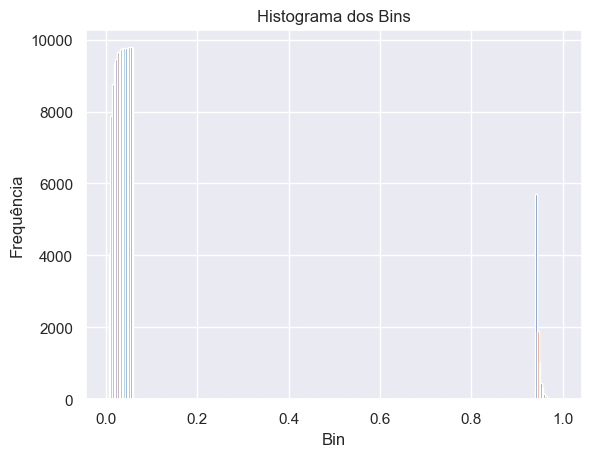

Intervalo 1: 1899.00 - 3049339.70
Intervalo 2: 3049339.70 - 7692539.89
Intervalo 3: 7692539.89 - 14389522.38
Intervalo 4: 14389522.38 - 23113536.86
Intervalo 5: 23113536.86 - 33827252.24
Intervalo 6: 33827252.24 - 46513154.96
Intervalo 7: 46513154.96 - 60350753.76
Intervalo 8: 60350753.76 - 72705673.92
Intervalo 9: 72705673.92 - 85083567.47
Intervalo 10: 85083567.47 - 101821851.54
Intervalo 11: 101821851.54 - 117833889.97
Intervalo 12: 117833889.97 - 128347031.33
Intervalo 13: 128347031.33 - 138614964.82
Intervalo 14: 138614964.82 - 153158179.80
Intervalo 15: 153158179.80 - 163380671.51
Valores unicos energia ativa: 


,nível_de_tensão,ano,mês,energia_ativa_(kwh),cpes_doméstico,cpes_iluminação_pública,cpes_não_doméstico,cpes_outros,cpes_mobilidade_eletrica_não,cpes_mobilidade_eletrica_sim,energia_ativa_bins
0,NaN,2022,8,5906036.429,20260.0,293.0,4318.0,83.0,11097.0,1.0,Intervalo 2: 3049339.70 - 7692539.89
1,NaN,2022,9,5316878.736,20270.0,293.0,4311.0,81.0,11298.0,1.0,Intervalo 2: 3049339.70 - 7692539.89
2,NaN,2022,10,5428732.778,20280.0,293.0,4302.0,81.0,11563.0,1.0,Intervalo 2: 3049339.70 - 7692539.89
3,NaN,2022,11,5843266.356,20291.0,293.0,4308.0,80.0,11969.0,1.0,Intervalo 2: 3049339.70 - 7692539.89
4,NaN,2022,12,6778130.292,20297.0,294.0,4312.0,82.0,12210.0,1.0,Intervalo 2: 3049339.70 - 7692539.89
...,...,...,...,...,...,...,...,...,...,...,...
9785,NaN,2023,9,2362739.409,0.0,0.0,65.0,0.0,7438.0,2.0,Intervalo 1: 1899.00 - 3049339.70
9786,NaN,2023,10,2434894.975,0.0,0.0,65.0,0.0,7617.0,2.0,Intervalo 1: 1899.00 - 3049339.70
9787,NaN,2023,11,2287322.884,0.0,0.0,66.0,0.0,7797.0,2.0,Intervalo 1: 1899.00 - 3049339.70
9788,NaN,2023,12,2324876.442,0.0,0.0,66.0,0.0,8191.0,2.0,Intervalo 1: 1899.00 - 3049339.70


In [39]:
energia_ativa = merged_df["energia_ativa_(kwh)"]

# Criar um binning por percentis com 15 bins
discretizer = KBinsDiscretizer(n_bins=15, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(energia_ativa.values.reshape(-1, 1))

# Converter a matriz esparsa em uma matriz densa
bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=15)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'Intervalo {i+1}: {bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df['energia_ativa_bins'] = pd.cut(energia_ativa,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

# Exibir os primeiros registros do DataFrame para verificar as mudanças
merged_df.head()
print(f"Valores unicos energia ativa: \n")
merged_df['energia_ativa_bins'].unique()

merged_df
